In [32]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Librerias para modelos 
from sklearn.cluster import KMeans, DBSCAN
# from hdbscan import HDBSCAN
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

# Hacemos un experimento?
Vamos a crear un dataset con dos campos, X e Y, y que la relación entre esos dos features parezca una carita feliz. 


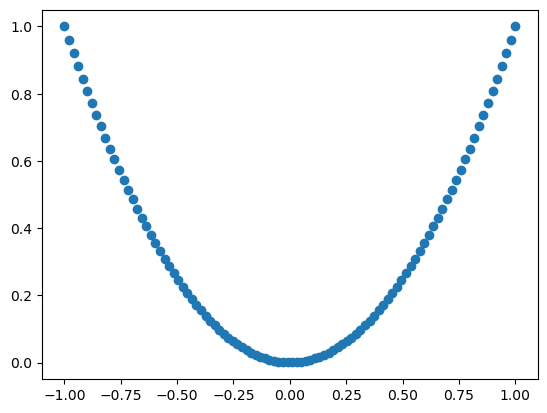

In [33]:
# Primero arrancamos con la boca
x_boca = np.linspace(-1, 1, 100)  # Coordenadas x desde -1 hasta 1
y_boca = x_boca**2  # Coordenadas y, la función cuadrática forma la U

# Crear el scatterplot
plt.scatter(x_boca, y_boca)

In [34]:
# Luego con los ojos
x_ojos = np.array([-0.5,0.5])
y_ojos = np.array([2,2])

In [35]:
y_completo = np.hstack((y_boca,y_ojos))
x_completo = np.hstack((x_boca,x_ojos))

# Crear un DataFrame con una columna llamada 'y'
df = pd.DataFrame({'y': y_completo,
                  'x': x_completo})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


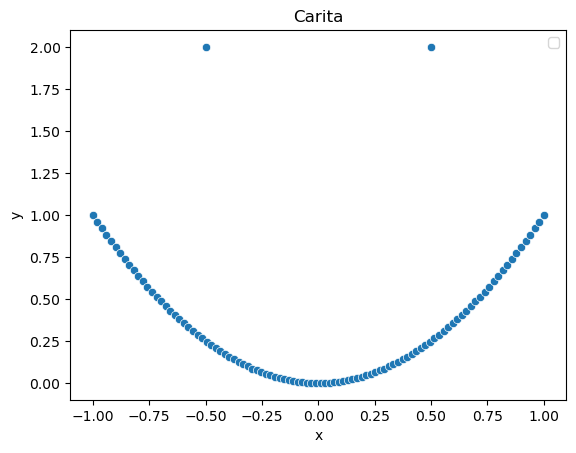

In [36]:
plt.figure()
sns.scatterplot(data = df,
                x = 'x',
                y = 'y') 
plt.title('Carita')
plt.legend()
plt.show()

In [37]:
# Vamos a agregarle puntos aleatorios para que parezca una mancha 
# Ojos 
x_ojos_aleat_1 = np.random.uniform(-0.65, -0.35, 100)
x_ojos_aleat_2 = np.random.uniform(0.35, 0.65, 100)
y_ojos_aleat = np.random.uniform(1.75, 2.25, 200)

# Boca
x_boca_aleat_1 = np.random.uniform(-1.2, 1.2, 500)
y_boca_aleat_1 = (x_boca_aleat_1 * np.random.uniform(0.8, 1.2, 500)) ** 2
x_boca_aleat_2 = np.random.uniform(-0.5, 0.5, 100)
y_boca_aleat_2 = np.random.uniform(0, 0.2, 100)

x_completo = np.hstack((x_boca,
                        x_ojos,
                        x_ojos_aleat_1,x_ojos_aleat_2,
                        x_boca_aleat_1,x_boca_aleat_2))
y_completo = np.hstack((y_boca,
                        y_ojos,
                        y_ojos_aleat,
                        y_boca_aleat_1,y_boca_aleat_2))

# Crear un DataFrame con una columna llamada 'y'
df = pd.DataFrame({'y': y_completo,
                  'x': x_completo})

# Mostrar el DataFrame
print(df)

            y         x
0    1.000000 -1.000000
1    0.960004 -0.979798
2    0.920824 -0.959596
3    0.882461 -0.939394
4    0.844914 -0.919192
..        ...       ...
897  0.019193 -0.082184
898  0.180010 -0.457389
899  0.073738 -0.087104
900  0.095574  0.212992
901  0.146874  0.205520

[902 rows x 2 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


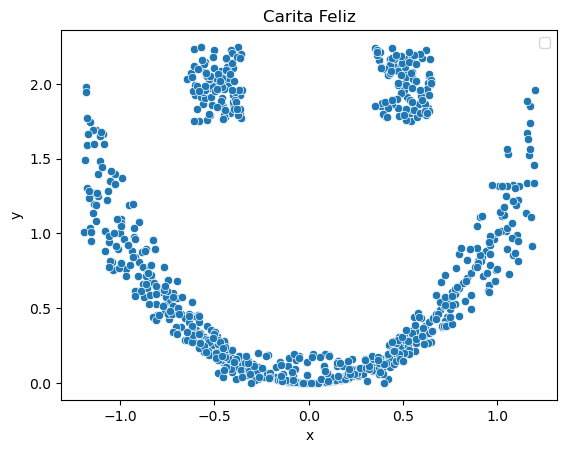

In [38]:
plt.figure()
sns.scatterplot(data = df,
                x = 'x',
                y = 'y') 
plt.title('Carita Feliz')
plt.legend()
plt.show()

# Resultados 

## K - MEANS

In [39]:
# Matriz de valores para los 3 modelos
X = df.values

In [46]:
# K Means
kmeans = KMeans(n_clusters = 3, 
                init = 'k-means++', 
                random_state = 42,
                max_iter = 100,
                tol = 0.05,
                n_init = 10) 
y_kmeans = kmeans.fit_predict(X)

In [47]:
df['Cluster_KMeans'] = y_kmeans
df.head()

,y,x,Cluster_KMeans
0,1.000000,-1.000000,0
1,0.960004,-0.979798,0
2,0.920824,-0.959596,0
3,0.882461,-0.939394,0
4,0.844914,-0.919192,0


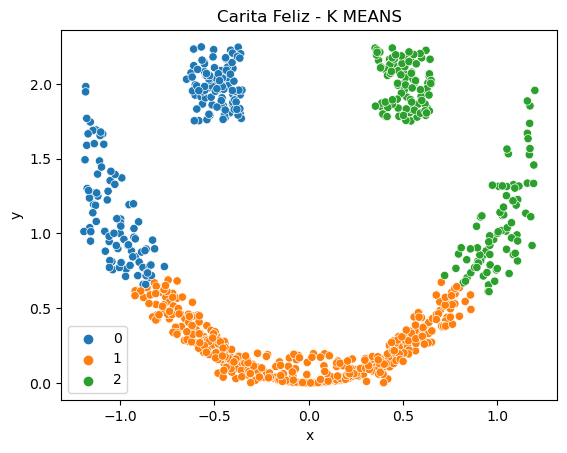

In [49]:
# Visualmente
df['Cluster_KMeans'] = df['Cluster_KMeans'].astype('category')
plt.figure()
sns.scatterplot(data = df,
                x = 'x',
                y = 'y',
               hue = 'Cluster_KMeans') 
plt.title('Carita Feliz - K MEANS')
plt.legend()
plt.show()

## DBSCAN

In [64]:
np.random.seed(100)
dbscan = DBSCAN(eps = 0.5, 
                min_samples = 5)
y_dbscan = dbscan.fit_predict(X)
df['Cluster_DBSCAN'] = y_dbscan
df.head()

,y,x,Cluster_KMeans,Cluster_DBSCAN,Cluster_DBSCAN_2
0,1.000000,-1.000000,0,0,0
1,0.960004,-0.979798,0,0,0
2,0.920824,-0.959596,0,0,0
3,0.882461,-0.939394,0,0,0
4,0.844914,-0.919192,0,0,0


In [65]:
df['Cluster_DBSCAN'].value_counts()

0    902
Name: Cluster_DBSCAN, dtype: int64

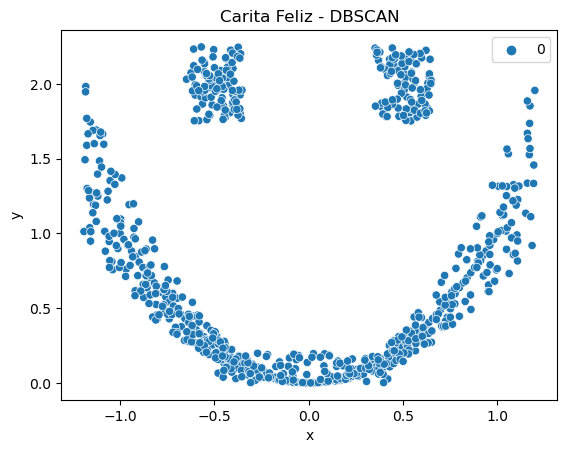

In [66]:
# Visualmente
df['Cluster_DBSCAN'] = df['Cluster_DBSCAN'].astype('category')
plt.figure()
sns.scatterplot(data = df,
                x = 'x',
                y = 'y',
               hue = 'Cluster_DBSCAN') 
plt.title('Carita Feliz - DBSCAN')
plt.legend()
plt.show()

In [67]:
np.random.seed(100)
dbscan = DBSCAN(eps = 0.3, 
                min_samples = 5)
y_dbscan = dbscan.fit_predict(X)
df['Cluster_DBSCAN_2'] = y_dbscan
df.head()

,y,x,Cluster_KMeans,Cluster_DBSCAN,Cluster_DBSCAN_2
0,1.000000,-1.000000,0,0,0
1,0.960004,-0.979798,0,0,0
2,0.920824,-0.959596,0,0,0
3,0.882461,-0.939394,0,0,0
4,0.844914,-0.919192,0,0,0


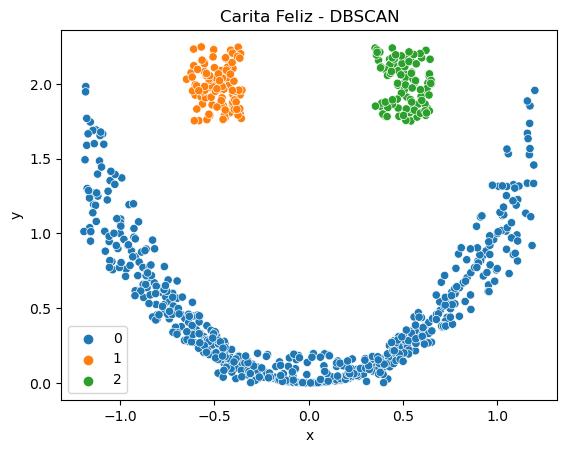

In [68]:
# Visualmente
df['Cluster_DBSCAN_2'] = df['Cluster_DBSCAN_2'].astype('category')
plt.figure()
sns.scatterplot(data = df,
                x = 'x',
                y = 'y',
               hue = 'Cluster_DBSCAN_2') 
plt.title('Carita Feliz - DBSCAN')
plt.legend()
plt.show()

# Apliquemoslo a un caso real

In [118]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Evaluemos posibles grupos combinando variables GrLivArea y LotFrontage
<br></br>
## Qué significan estas variables?
**GrLivArea:** Espacio habitable que se encuentra por encima del nivel del suelo, excluyendo, por ejemplo, sótanos o áreas subterráneas.<br>
**LotFrontage:** Medida de la fachada del lote que está directamente adyacente a la calle.
<br></br>

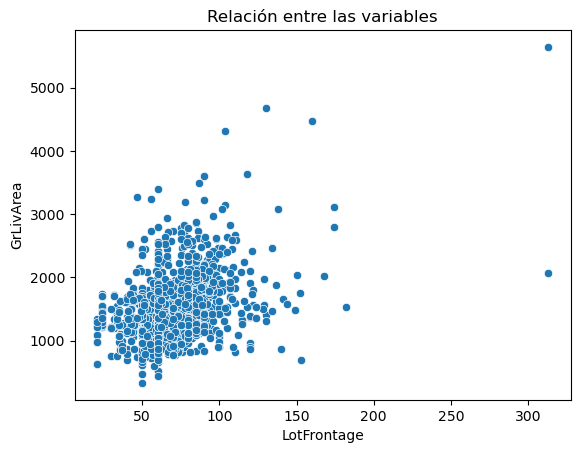

In [119]:
# Relación entre las variables
plt.figure()
sns.scatterplot(data = df,
                x = 'LotFrontage',
                y = 'GrLivArea') 
plt.title('Relación entre las variables')
plt.show()

In [120]:
df[['LotFrontage','GrLivArea']].isnull().sum()

LotFrontage    259
GrLivArea        0
dtype: int64

In [121]:
# Eliminemos valores vacíos para facilitar el análisis
df_sinnull = df.loc[df['LotFrontage'].isnull()==False,]
df_sinnull = df_sinnull.reset_index()

# Análisis de K Means
Usemos el método del codo para elegir cantidad de clusters

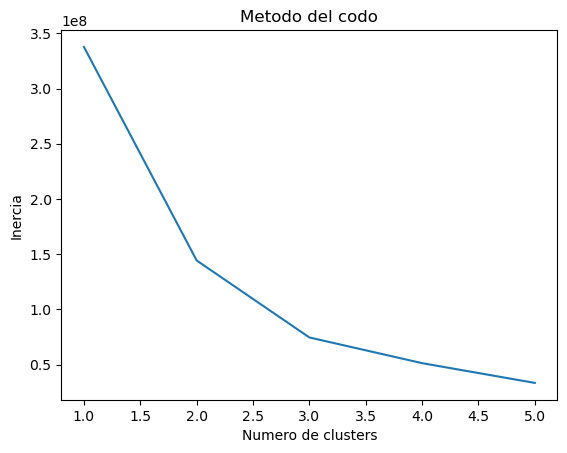

In [122]:
X = df_sinnull[['LotFrontage','GrLivArea']].values
# Genero distintos algoritmos para definir el n_cluster que más me convence
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

In [123]:
# Genero el modelo
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, 
                init = 'k-means++', 
                max_iter = 300, 
                n_init = 10, 
                random_state = 12,
                tol = 0.05) 

In [124]:
# Construyo dataframe con predicciones 
df_sinnull['Cluster_kmean'] = kmeans.fit_predict(X)

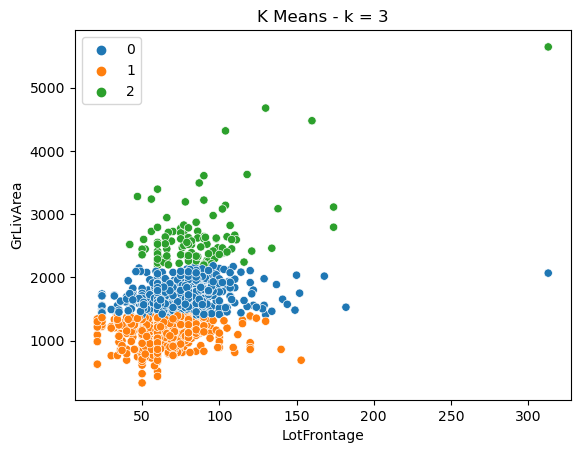

In [125]:
# Visualmente
df_sinnull['Cluster_kmean'] = df_sinnull['Cluster_kmean'].astype('category')
plt.figure()
sns.scatterplot(data = df_sinnull,
                x = 'LotFrontage',
                y = 'GrLivArea',
               hue = 'Cluster_kmean') 
plt.title('K Means - k = 3')
plt.legend()
plt.show()

In [126]:
# Aparentemente está priorizando la variable GrLivArea para generar los grupos. 
# Veamos algunas métricas 
resultados = df_sinnull.groupby('Cluster_kmean').agg(
    Cant = ('LotFrontage', 'count'),
    Promedio_LotFrontage = ('LotFrontage', 'mean'),
    Mediana_LotFrontage = ('LotFrontage', 'median'),
    Promedio_GrLivArea = ('GrLivArea', 'mean'),
    Mediana_GrLivArea = ('GrLivArea', 'median')
).reset_index()
resultados.round(2)

,Cluster_kmean,Cant,Promedio_LotFrontage,Mediana_LotFrontage,Promedio_GrLivArea,Mediana_GrLivArea
0,0,532,73.99,73.0,1708.15,1683.5
1,1,556,62.80,60.0,1092.50,1116.5
2,2,113,87.16,85.0,2643.41,2519.0


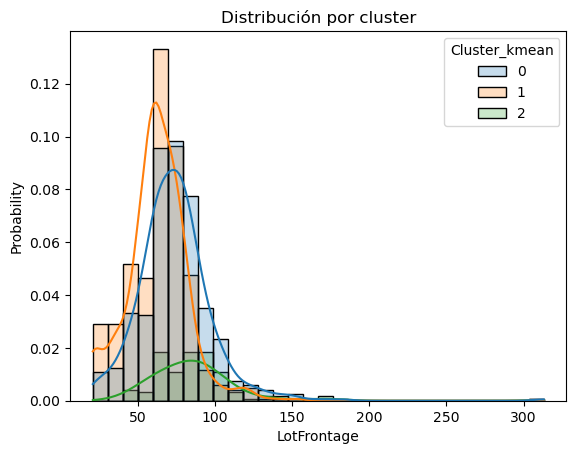

In [127]:
# Distribuciones
plt.figure()
# Histograma
sns.histplot(data = df_sinnull,
             x = 'LotFrontage',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_kmean')
plt.title('Distribución por cluster')
plt.show()

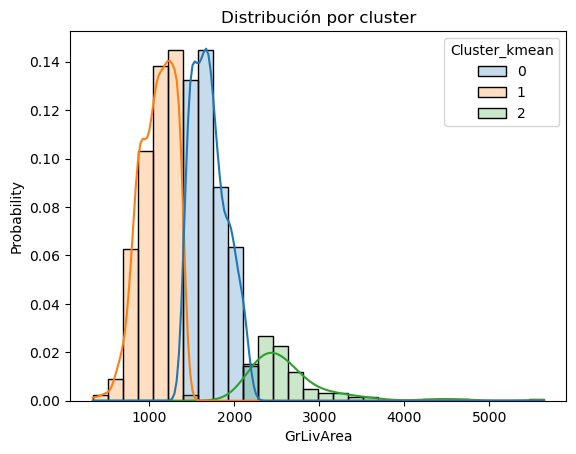

In [128]:
# Distribuciones
plt.figure()
# Histograma
sns.histplot(data = df_sinnull,
             x = 'GrLivArea',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
            hue = 'Cluster_kmean')
plt.title('Distribución por cluster')
plt.show()

Text(0.5, 1.0, 'Relación entre Precio de Venta y Cluster')

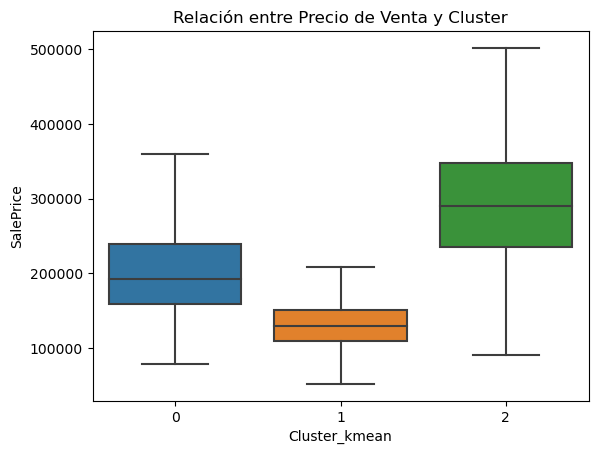

In [129]:
# Valen la pena los grupos frente al target? 
# Boxplot
plt.figure()
sns.boxplot(data = df_sinnull,
            x = 'Cluster_kmean',
            y = 'SalePrice', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Cluster')

# Análisis DBSCAN

In [131]:
np.random.seed(42)
dbscan = DBSCAN(eps = 42, 
                min_samples = 10)
y_dbscan = dbscan.fit_predict(X)
df_sinnull['Cluster_DBSCAN'] = y_dbscan
df_sinnull['Es_Ruido'] = np.where(df_sinnull['Cluster_DBSCAN'] == (-1),1,0)

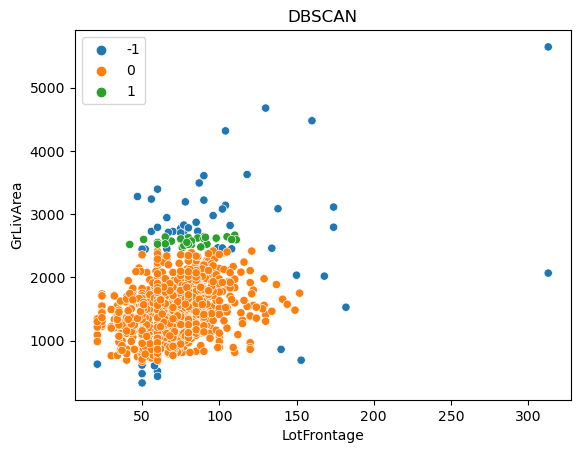

In [132]:
# Visualmente 
df_sinnull['Cluster_DBSCAN'] = df_sinnull['Cluster_DBSCAN'].astype('category')
plt.figure()
sns.scatterplot(data = df_sinnull,
                x = 'LotFrontage',
                y = 'GrLivArea',
               hue = 'Cluster_DBSCAN') 
plt.title('DBSCAN')
plt.legend()
plt.show()

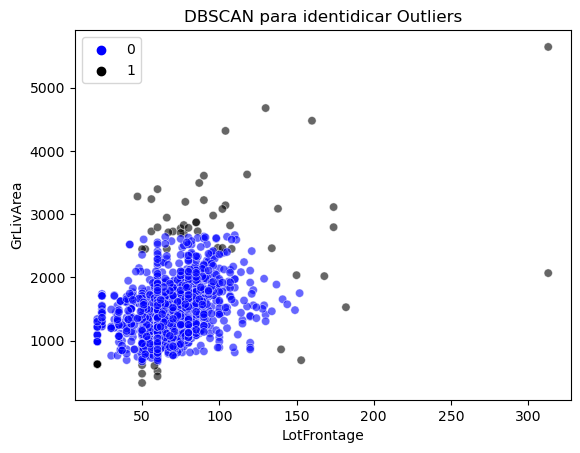

In [133]:
# Posibles outliers
plt.figure()
sns.scatterplot(data = df_sinnull,
                x = 'LotFrontage',
                y = 'GrLivArea',
                hue = 'Es_Ruido',
                alpha = 0.6,
                palette={0: 'blue', 1: 'black'}) 
plt.title('DBSCAN para identidicar Outliers')
plt.legend()
plt.show()

# ¿Y cómo sigue esto? 
Si usamos el algoritmo para detectar posibles outliers, y consideramos que efectivamente esos puntos pueden serlo, hay que definir posibles estrategias para darle tratamiento a estos valores: 
1. **Eliminación de registros:** NO RECOMENDADA!
2. **Transformación de los datos:** Podemos suavizar distribuciones con una tranformación logaritmica, o calcular la raíz cuadrada del feature.
3. **Capping o truncamiento:** Establecer límites superiores e inferiores para los valores de las características puede ser una estrategia efectiva. Puedes reemplazar los valores extremos que están por encima o por debajo de ciertos umbrales con los valores de los umbrales respectivos.
4. **Imputación:** Puedes imputar valores para los outliers en lugar de eliminarlos. Esto implica reemplazar los valores extremos por valores estimados basados en el resto de los datos. La imputación puede hacerse utilizando estadísticas descriptivas (como la media o la mediana) o métodos más avanzados como la imputación por vecinos más cercanos.
5. **Segmentación de datos:** Si los outliers son representativos de patrones específicos en los datos, puedes considerar crear segmentos separados para manejarlos de manera diferente. Esto puede implicar entrenar modelos específicos para los diferentes segmentos.